# Custom Artificial Neural Network
We'll be building a custom neural network from scratch using simple mathematics and python's Numpy package.

###### What is an Artificial Neural Network(ANN)?
An ANN can simply be defined as a computer system designed to emulate the brain in its ability to learn.  
As the name suggests, it is the coming together of several neurons to achieve a common purpose.  
In this notebook I'll explain in a comprehensive manner how NNs work each step of the way.  
<br>
We'll train this Neural Network on the famous MNIST dataset. The dataset was downloaded from kaggle. If you wish to procure the data it is available [here]()

In [1]:
# Import necessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data into a pandas dataframe.
data = pd.read_csv(r"C:\Users\ifunanyaScript\Everything\NN_maths_and_numpy/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This is the MNIST dataset. The entire dataset is made up of 60000 samples of handwritten digits however this particular<br>partition of the dataset is only 42000 samples. These samples are 28x28 pixel grayscale images.<br>
As we can see above, there are a total of 785 columns including the label column. This is as a result of flattening the 28x28 image to a 1D array of 784 values. Hence, each row represents a sample.  
__NB:__ An image can be reconstructed by reshaping the sample by (28, 28).

The prospective NN cannot understand a pandas dataframe, so we'd have to convert it to a numpy array.  
Also we'd get the shape of the data, i.e rows and columns.  
Finally, we'll shuffle the data. This is a normal practice to ensure randomness in the dataset.

In [3]:
# Convert the dataframe to a numpy array.
data = data.to_numpy()

# rows, columns.
samples, features = data.shape

# Shuffle for randomness.
np.random.shuffle(data)

To make assessment of the data easier, we'll transpose the data, such that each row now becomes a column and each column a row.  

When training any machine learning model even ANNs, the goal is always to achieved a superb accuracy on unseen data.  
The norms is to spare a little portion of the data at hand for this purpose. Hence, I'll leave out 1000 samples for testing and use the remaining 41000 for training the NN.  

Also another important thing to take note of is scaling/normalisation. Each image is made of 784 values that range from 0-255. The magnitude of this range could affect the performance of the NN, so we handle this by scaling the data such that the range is now 0-1; 0 still being black and 1 being white, then decimals between 0 and 1 are shades of gray.

In [4]:
# Split the data into train and test chunks, then tanspose.
train_data = data[1000:samples].T
test_data = data[0:1000].T

# Define features(X) and targets(Y) and scale X.
X_train = train_data[1:features]
X_train = X_train/255.
Y_train = train_data[0]

X_test = test_data[1:features]
X_test = X_test/255.
Y_test = test_data[0]

Now, to the main event... 
###### How does a neural network operates internally?
We can think of a neural network as a group, working on a specific task to achieve the best result possible.  
This group is divided into sub groups, and each sub group is supposed to contribute in a way to achieve the best result. <br>
Hypothetically, a group of 100 workers are given a task to build a specific type house. They decide to split themselves into 5 groups.<br> 
40 people will gather materials, <br>
30 people will construct the structure, <br>
10 people will mount the roof, <br>
10 people will paint the house,<br>
And the last 10 people will report to the supervisor.
<br>

Now, the first four sub groups work on their different tasks and get the house built, then the final group reports to the supervisor.  
In neural network this process is called the __Forward propagation__. <br>

After the report, the supervisor gives a feedback that, he is not satisfied with the house they have built, and the 10 reporters take this information back to the group. In neural network, this would be the __loss function__<br>

With this information, the group takes a look at the individual contributions of each sub group, to find out which ones played a part in the poorly built house.<br> In neural network, this process is called __Backward propagation.__<br>

Finally, the group finds where the mistakes are, then makes some ammendments, whether in materials gathered, or structure constructed, or roof mounted, or the colour of paint used, such that the next house they build will better satisfy the supervisor. In neural network this process is called __Gradient descent.__  
<br>
These four process are carried out respectively and iteratively until the supervisor is satisfied with the house. 
In neural network, the sum of all these process is called the __Training loop.__<br>

This is a perfect summary of neural networks and how they work.<br>

We have 10 digits to classify(task),<br>
We set up a neural network of 4 layers(sub groups); <br>
The first layer is the input layer(material gatherers), <br>
The middle layers are the hidden layers(masons, roofers, painters, etc), <br>
The final layer is the output layer(reporters).<br>

You can go through the above note and noodle it in its entirety to fully understand the concept. <br>  

If you've comprehended the previous concept, understanding the math behind neural network is rather simpler than you thought.  
A neural network as the name suggest is a network of neurons all working together to achieve the best result.  
Now we have a task at hand, which is digit classification. We'll build a neural network that would be able to classify these 10 handwritten digits.

Each sample is a 28x28 pixel image, thus we 784 grayscale values. For this we'll need 784 neurons in the input layer.<br>
Then I'll implement only one hidden layer. The number of neurons in this hidden layer is arbitrary, so I'll just choose 10. <br>
The last/output layer will contain 10 neurons corresponding to the 10 digits. <br>

Now, the most interesting part of the neural network is the training/learning process. But how does the NN learn anything?; there are trainable/learnable parameters called weights and biases.  
These weights and biases are numbers used to perform linear operations within a neuron of the network. These linear operation are multiplication for weights and addition for biases.<br>

When an image array is passed to the neural network, from the input layer, the 784 pixel values are multiplied by these weights and these bias terms are added to them. This multiplication and addition process is done throughtout the network till the final layer where the classification result is computed using a probability function(softmax). This is the __forward propagation__.<br>

Remember I earlier stated that the group working on building a house will try to find out where mistakes are and correct accordingly. Well, after the classification result is computed, the result is compared with the actual label using a loss function. Then with the loss/error, we can calculate how much each weight contributed to the error. This is the __backward propagation__. <br>

Now, that we have the gradient of the loss with respect to the weights, we can update the weights appropriately. This is the __gradient descent__.  

Recall, this is an iteratively process. The process is carried out until the NN achieves a minimum loss and maximum accuracy. 

__NB:__ What makes the neural network a powerful architecture is something called activation functions. Activation functions introduce non-linearity into the NN. Without activation functions, the neural network would just be a large and complex linear regression. Hence, the results of each linear operation of weights and biases will be activated using an activation function.<br>Examples of activation functions are ReLU, TanH, LeakyReLU, Sigmoid, Softmax. The first three are usually utilised in hidden layers, while the last two are for output layers. 

At this point, we can start building the neural network.  
I earlier mentioned that there are a bunch of mathematical operations that go on within the network. For the purpose of handling these operations we'll define a bunch of functions.  
<br>
Let's start will all the functions required for the forward propagation.  
The first important thing to address is the weights and biases. The initial weights and biases will be randomly generated, and while the network is trained they'll be subsequently optimised.  
We can generate these weights using the `rand` function in the numpy package....

In [5]:
# Randomly generates the initial weights and biases.
def initial_parameters():
    first_weights = np.random.rand(10, 784) - .5
    first_bias = np.random.rand(10, 1) - .5
    second_weights = np.random.rand(10, 10) - .5
    second_bias = np.random.rand(10, 1) - .5
    return first_weights, first_bias, second_weights, second_bias

You might wonder why I am subtracting __.5__ from the above weights and biases; this is to keep the range of the weights between -0.5 and 0.5, instead of 0-1.  
As we go further, I'll explain how these weights multiply our inputs to give an output.  
<br>
The next function to define is the activation function and the derivative of this activation function.  
I will define LeakyReLU and ReLU activation functions, but for the purpose of this project, I think I'll utilise LeakyReLU.  
The LeakyReLU is a more robust ReLU function, in the sense that pays a little attention to values that are below zero. This way, the LeakyReLU solves the dying ReLU problem...

In [6]:
# # Leaky ReLU activation.
# def Leaky_ReLU(step_1, alpha):
#     for sub_array in step_1:
#         for i, value in enumerate(sub_array):
#             if value>0:
#                 sub_array[i] = value
#             else:
#                 sub_array[i] = (alpha*value)
#     return step_1

# # Derivative of Leaky ReLU activation.
# def LR_deriv(step_1, alpha):
#     for sub_array in step_1:
#         for i, value in enumerate(sub_array):
#             if value>0:
#                 sub_array[i] = 1
#             else:
#                 sub_array[i] = alpha
#     return step_1


# ReLU activation.
def ReLU(Z):
    return np.maximum(Z, 0)

# Derivative of ReLU actiavtion.
def ReLU_deriv(Z):
    return Z > 0

Do not trouble yourself with this LeakyReLU function. What you simply need to know is that when the value in a neuron is greater than __0__, the function returns that same value, but when the value is less than __0__, the function returns alpha. Alpha is usually __0.01__.  
<br>

The next function to define will be the activation function for the last layer.  
Now, how will one choose the correct activation for the last layer? Well, this is dependent on the task at hand.  
There are two types of classification problems associated with NNs namely; binary classification and multiclass classification.<br>
In binary classification, a sigmoid function is utilised at the final layer. Whereas, in multiclass classificatiion, a softmax function is used.  
The problem at hand is to classify 10 digits. Apparently, this is a multiclass classification. So we'll use the appropriate activation...

In [7]:
# Softmax activation for output layer.
def Softmax(step_3):
    prob_array = np.exp(step_3) / sum(np.exp(step_3))
    return prob_array

The softmax function, takes an array of neurons, i.e values, and returns an array of probability.  
These probabilities implies the likelihood of what the input image is. For example, the Softmax function spits out this array: <br>[0.01, 0.98, 0.0, 0.0, 0.03, 0.05, 0.1, 0.0, 0.05, 0.05],<br> As we can see the index containing the highest probability of 98% is the index 1. Thus, the network is suggesting that the input image is digit __1__.  
<br>

Okay, the next function to define, is a function that one-hot encodes the target label. One-Hot encoding is an approach of representing target labels using zeros and one. This represents labels as arrays of zeros and one. For example, have a look at this: <br>
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]<br>
We are classifying 10 digits 0-9. The above array means that the target label is __6__, because index 6 has a value of 1 and the rest are zeros.  
So we can say one-hot encoding represents the labels as a binary array of zeros and one or as a True(1) or False(0) array...

In [8]:
# One-Hot encoder for target labels.
def One_Hot_Encoder(Y_train):
    binary_labels = np.zeros((Y_train.size, Y_train.max() + 1))
    binary_labels[np.arange(Y_train.size), Y_train] = 1
    binary_labels = binary_labels.T
    return binary_labels

Fantastic!!!<br>
We have defined all the functions we need for the forward propagation.  
Now we can define the function that will carry out the actual forward propagation..

In [9]:
# Forward propagation.
def forward_pass(first_weights, first_bias, second_weights, second_bias, X_train):
    step_1 = first_weights.dot(X_train) + first_bias
    step_2 = ReLU(step_1)
    step_3 = second_weights.dot(step_2) + second_bias
    step_4 = Softmax(step_3)
    return step_1, step_2, step_3, step_4

I arranged all the processes step by step to aid easier understanding.<br>  
In the first step, we perform a dot product operation of the first weights and the 784 input values, then add the first bias terms.  
In the second step, we activate the result of the first step using the predefined LeakyReLU function.  
In the third step, we perform another dot product operation of the second weights and the resulting values from second step, then add the second bias terms.  
In the fourth and final step we activate the result of the third step, to yeild a probability array using the predefined Softmax function.<br>  
After the forward propagation, the next issue to address is backward propagation.  
After the loss is calculated, the backward propagation is used to get the derivative of each step with respect to the loss.  
This is done to know how much of the loss each weight is responsible for.  
Let's define the function for backward propagation...

In [10]:
# Backward propagation.
def backward_pass(step_1, step_2, step_3, step_4, first_weights, second_weights, X_train, Y_train):
    binary_labels = One_Hot_Encoder(Y_train)
    d_step_3 = (step_4 - binary_labels)
    d_second_weights = 1/samples * d_step_3.dot(step_2.T)
    d_second_bias = 1/samples * np.sum(d_step_3)
    d_step_2 = second_weights.T.dot(d_step_3) * ReLU_deriv(step_1)
    d_first_weights = 1/samples * d_step_2.dot(X_train.T)
    d_first_bias = 1/samples * np.sum(d_step_2)
    return d_first_weights, d_first_bias, d_second_weights, d_second_bias

This function is basically the reverse of the forward_pass.  
The first step(`d_step_3`) is substracting our probability array from the binary labels. This gives us the loss/error of the network<br>
The second step(`d_second_weights`), calculates how much the second weight matrice contributed to the overall loss.<br>
The third step(`d_second_bias`), calculates how much the second bias terms contributed to the overall loss.<br>
The fourth step(`d_step_2`), is essentially calculating the derivative of the activation function.<br>
The fifth step(`d_first_weights`), calculates how much the first weight matrice contributed to the overall loss.<br>
The sixth step(`d_first_bias`), calculates how much the first bias terms contributed to the overall loss.<br>  
Now, all these derivatives can be used to adjust the weights and biases appropriately.  
For this we'll define a function that updates the weights and biases....

In [11]:
# Update function for weights and biases.
def update_parameters(first_weights, first_bias, second_weights, second_bias,
                      d_first_weights, d_first_bias, d_second_weights, d_second_bias, 
                      learning_rate):
    first_weights = first_weights - d_first_weights*learning_rate
    first_bias = first_bias - d_first_bias*learning_rate
    second_weights = second_weights - d_second_weights*learning_rate
    second_bias = second_bias - d_second_bias*learning_rate
    return first_weights, first_bias, second_weights, second_bias

This is a simple function. We just subtract gradients from the initial weights.  
You might ask, why do we subtract? Well, we subtract so that the weights are moving in the direction of the gradient descent.

Essentially, the above functions are all that is needed to build a neural network.  
However, we have to assemble all of these functions together to build the actual network. But before we do that, I want to define two functions; one for getting predictions and the other for measuring accuracy.

In [27]:
# Get neural network predictions.
def predictions(step_4):
    return np.argmax(step_4, 0)

# Measure network's accuracy.
def accuracy(predictions, Y_train):
    return np.sum(predictions == Y_train)/Y_train.shape[0]

Try to wrap your head around the fucntions above, they are pretty straight forward and easy to grasp.<br>  
Now, we'll define a giant function that takes all our component functions and build a beautiful neural network.  
I'll call this function gradient descent because that the whole process of learning in a neural network, i.e<br>
The neural network makes predictions,<br>
Calculates the error of the predictions,<br>
Get the gradient of the loss with respect to all the weights,<br>
Then update the weights, such that the gradient of the loss decreases....
__Gradient Descent.__

In [13]:
# Gradient for training the network.
def gradient_descent(X_train, Y_train, learning_rate, epochs):
    first_weights, first_bias, second_weights, second_bias = initial_parameters()
    for epoch in range(epochs):
        step_1, step_2, step_3, step_4 = forward_pass(first_weights, first_bias,
                                                      second_weights, second_bias, X_train)
        
        d_first_weights, d_first_bias, d_second_weights, d_second_bias = backward_pass(
                                                                        step_1, step_2, 
                                                                        step_3, step_4,
                                                                        first_weights,
                                                                        second_weights, 
                                                                        X_train, Y_train)
        
        first_weights, first_bias, second_weights, second_bias = update_parameters(
                                                            first_weights, first_bias, 
                                                            second_weights, second_bias,
                                                            d_first_weights, d_first_bias, 
                                                            d_second_weights, d_second_bias, 
                                                            learning_rate)

        if epoch % 100 == 0:
            print(f"Epoch: {epoch}/{epochs}")
            pred = predictions(step_4)
            print(f"Accuracy: {(accuracy(pred, Y_train)*100):.2f}%\n_________________")
    return first_weights, first_bias, second_weights, second_bias

Please take some time to digest the above function.  
It's exactly what I described with the 100 workers building a house. The division of labour.<br>

The first step is the forward pass were the network makes prediction, equivalent to building the house.<br>
The second step is calculating loss and back propagation, equivalent to reporting to the supervisor and finding out where mistakes were made.<br>
The third step is updating the weights and bias terms of the network to improve performance and reduce loss, equivalent to the group making ammendments where due to build a better house that satisfies the supervisor.  
<br>
__NB:__ The above process is carried out iteratively until the accuracy is superb and the loss is negligible, equivalent to the workers, rebuilding the house until the supervisor is satisfied.

In [14]:
# Parameter for training the NN.
LEARNING_RATE = 0.1
EPOCHS = 10000

# Training step/loop.
first_weights, first_bias, second_weights, second_bias = gradient_descent(X_train, Y_train, LEARNING_RATE, EPOCHS)

Epoch: 0/10000
Accuracy: 7.94%
_________________
Epoch: 100/10000
Accuracy: 61.73%
_________________
Epoch: 200/10000
Accuracy: 74.50%
_________________
Epoch: 300/10000
Accuracy: 79.47%
_________________
Epoch: 400/10000
Accuracy: 82.04%
_________________
Epoch: 500/10000
Accuracy: 83.74%
_________________
Epoch: 600/10000
Accuracy: 85.06%
_________________
Epoch: 700/10000
Accuracy: 85.90%
_________________
Epoch: 800/10000
Accuracy: 86.60%
_________________
Epoch: 900/10000
Accuracy: 87.16%
_________________
Epoch: 1000/10000
Accuracy: 87.65%
_________________
Epoch: 1100/10000
Accuracy: 88.00%
_________________
Epoch: 1200/10000
Accuracy: 88.31%
_________________
Epoch: 1300/10000
Accuracy: 88.60%
_________________
Epoch: 1400/10000
Accuracy: 88.80%
_________________
Epoch: 1500/10000
Accuracy: 89.04%
_________________
Epoch: 1600/10000
Accuracy: 89.21%
_________________
Epoch: 1700/10000
Accuracy: 89.38%
_________________
Epoch: 1800/10000
Accuracy: 89.54%
_________________
Epoch:

Incredible!!!<br>
Without any deep learning framework, we have built this custom Artificial Neural Network that achieved over 93% accuracy.<br>
Remember, the whole of the training process is to optimise the initial weights and bias terms.  
With this optimised weights, if we carry out the forward pass again, i.e predictions, we should get a high accuracy and a negligible loss.<br>  

It's time to actually test the NN and compare its predictions to the actual label.  
For this purpose, we'll define two functions.  
One, for getting the prediction of the NN.  
Two, for comparing the prediction with the actual label.  
Also, I'll modify the predefined predefined `predictions` function, so that we can get the confidence of the NN's prediction.

In [30]:
# Modified `predictions` to contain confidence.
def predictions(step_4):
    pred = np.argmax(step_4, 0)
    confidence = round(100 * (np.max(step_4)), 2)
    return pred, confidence

# NN prediction.
def test(X, first_weights, first_bias, second_weights, second_bias):
    _, _, _, step_4 = forward_pass(first_weights, first_bias, second_weights, second_bias, X)
    pred, confidence = predictions(step_4)
    return pred, confidence

# Validating the prediction.
def test_validation(index, first_weights, first_bias, second_weights, second_bias):
    image_sample = X_train[:, index, None]
    pred, confidence = test(image_sample, first_weights, first_bias, second_weights, second_bias)
    label = Y_train[index]
    
    image_sample = image_sample.reshape((28, 28)) * 255
    plt.imshow(image_sample, interpolation="nearest", cmap="gray")
    plt.title(f"Model's prediction: {pred}\nConfidence: {confidence}%\nActual label: {label}")
    plt.axis("off")
    plt.show()

Assimilate the above functions. They are pretty straight forward.  
`test` simply returns the NN's prediction.  
`test_validation` compares the NN's prediction and the actual label. And displays the predicted sample.

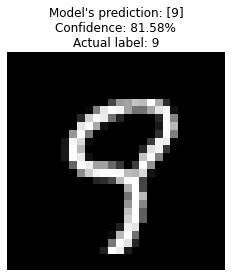

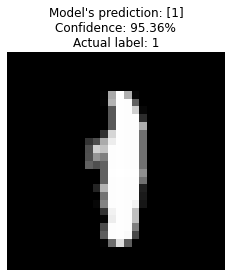

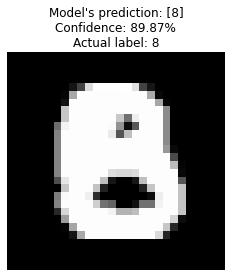

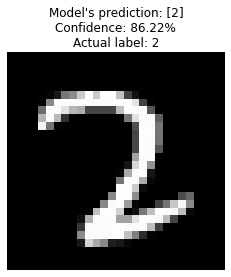

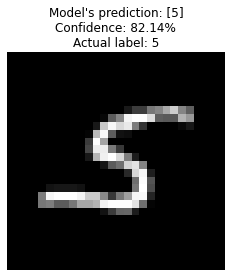

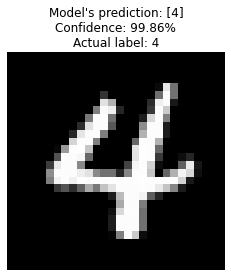

In [31]:
test_validation(5, first_weights, first_bias, second_weights, second_bias)
test_validation(34, first_weights, first_bias, second_weights, second_bias)
test_validation(56, first_weights, first_bias, second_weights, second_bias)
test_validation(89, first_weights, first_bias, second_weights, second_bias)
test_validation(101, first_weights, first_bias, second_weights, second_bias)
test_validation(234, first_weights, first_bias, second_weights, second_bias)

Let's finally see the performance of this neural network on the testing chunk we set out prior.

In [32]:
predictions, _ = test(X_test, first_weights, first_bias, second_weights, second_bias)
print(f"Accuracy on testing data: {accuracy(predictions, Y_test) * 100}%")

Accuracy on testing data: 93.5%


Astounding!!!  
The network achieved an amazing accuracy on the test data.  

# Separate testing without labels.
I downloaded this dataset from kaggle, so there's an entire dataset, set out for testing.<br>
This dataset isn't labelled, it only has pixel values and it's left for the NN to figure <br>
out which number each sample is. <br>
__We will validate if the NN is doing well by plotting each sample it predicts__, _we have eyes_.

In [59]:
another_data = pd.read_csv(r"C:\Users\ifunanyaScript\Everything\NN_maths_and_numpy\test.csv")
another_data.head() 

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Clearly there's no label for the samples. We are going in blindly.

In [60]:
# We load the data into a numpy array and transpose it.
another_data = another_data.to_numpy()
another_array = another_data.T
another_data.shape, another_array.shape

((28000, 784), (784, 28000))

In [62]:
# Let's see a sample.
another_array[:,0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  10,  17,  17,  17,  17,  81, 180, 180,
        35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 139, 253, 253, 253, 253, 253,
       253, 253,  48,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  60, 228, 253, 25

In [63]:
# This function predicts the number using the trained or optimised parameters(weights and biases).
def predict_number(index, first_weights, first_bias, second_weights, second_bias):
    the_sample = test_array[:, index, None]
    pred = test(test_array[:, index, None], first_weights, first_bias, second_weights, second_bias)
    print(f"Model's prediction: {pred}")
    
    the_sample = the_sample.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(the_sample, interpolation="nearest")
    plt.show()

Model's prediction: [5]


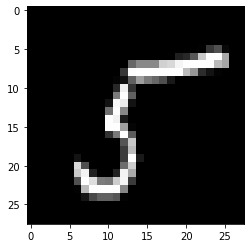

Model's prediction: [6]


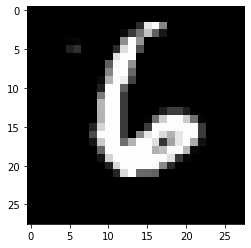

Model's prediction: [3]


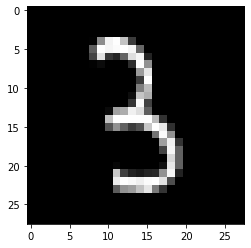

Model's prediction: [5]


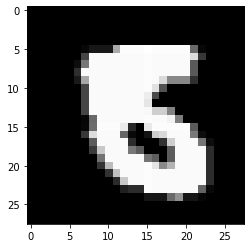

Model's prediction: [0]


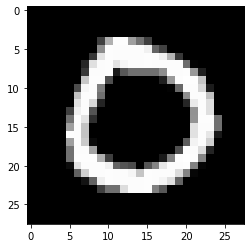

Model's prediction: [6]


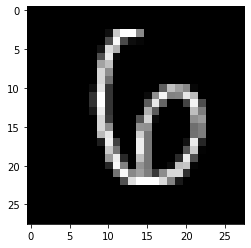

Model's prediction: [0]


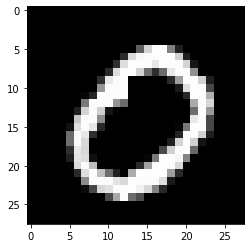

Model's prediction: [0]


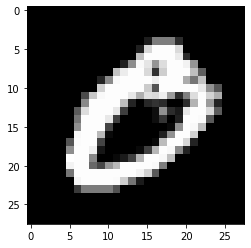

Model's prediction: [2]


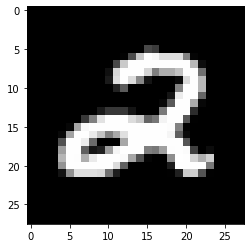

Model's prediction: [1]


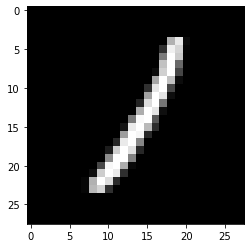

Model's prediction: [3]


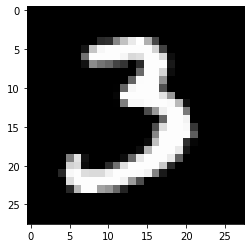

Model's prediction: [6]


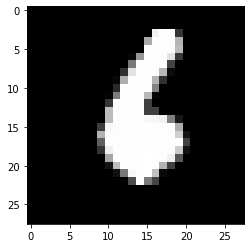

In [68]:
predict_number(23, first_weights, first_bias, second_weights, second_bias)
predict_number(300, first_weights, first_bias, second_weights, second_bias)
predict_number(15001, first_weights, first_bias, second_weights, second_bias)
predict_number(789, first_weights, first_bias, second_weights, second_bias)
predict_number(23456, first_weights, first_bias, second_weights, second_bias)
predict_number(3400, first_weights, first_bias, second_weights, second_bias)
predict_number(4309, first_weights, first_bias, second_weights, second_bias)
predict_number(23787, first_weights, first_bias, second_weights, second_bias)
predict_number(27999, first_weights, first_bias, second_weights, second_bias)
predict_number(19040, first_weights, first_bias, second_weights, second_bias)
predict_number(7802, first_weights, first_bias, second_weights, second_bias)
predict_number(9019, first_weights, first_bias, second_weights, second_bias)

Voilà!!! With our eyes we can see our NN is very good.<br>
It predicted all the samples we gave it, except the forth sample.<br>
Personally, I am unsure about the forth one myself, so.<br>
<br>
I hope this notebook has enlightened you on a basic level of how neural networks function<br>
under the hood. It's all a bunch of maths and more maths, but it's powerful and now you know too 😏😃.

In [128]:
# ifunanyaScript
